In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from google.colab import drive
from zipfile import ZipFile
import zipfile
from tensorflow import keras
import tensorflow_datasets as tfds
#import splitfolders
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import svm
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
from keras import applications
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.applications.imagenet_utils import preprocess_input
import os
import cv2
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"faridasabry01","key":"9c31e0e6774d05b7403c3d204c76c40a"}'}

In [ ]:
! mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d techsash/waste-classification-data

100% 426M/427M [00:16<00:00, 30.4MB/s]
100% 427M/427M [00:16<00:00, 27.9MB/s]


In [ ]:
!unzip waste-classification-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [ ]:
IMG_SHAPE  = 224
batch_size = 32
validation_split = 0.2
#image preproccsing in train
train_data = ImageDataGenerator(rescale=1./255,validation_split=validation_split).flow_from_directory(
    directory='/content/DATASET/TRAIN',
    batch_size=batch_size,
    shuffle=True,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='categorical',
    classes=['O', 'R'],
    subset='training'
)
target_train = train_data.labels

Found 18052 images belonging to 2 classes.


In [ ]:
from pathlib import Path
import imghdr

data_dir = "/content/DATASET/TRAIN"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)

        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

In [ ]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_split  # Set the validation split
)

# Load and preprocess validation images
val_data = val_datagen.flow_from_directory(
    directory='/content/DATASET/TRAIN',
    target_size=(IMG_SHAPE, IMG_SHAPE),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set the subset as 'validation' for the validation set
)

Found 4512 images belonging to 2 classes.


In [ ]:
IMG_SHAPE  = 224
batch_size = 32
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES= True
#image preproccsing on test
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory='/content/DATASET/TEST',
    batch_size=batch_size,
    shuffle=False,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='categorical',
    classes=['O', 'R']
)

Found 2513 images belonging to 2 classes.


In [ ]:
from pathlib import Path
import imghdr

test_dir = "/content/DATASET/TEST"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(test_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)

        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

In [ ]:
# Load the VGG16 model with pre-trained weights
vgg16_base_model = VGG16(include_top=False, input_shape=(IMG_SHAPE, IMG_SHAPE, 3), weights='imagenet')

# Freeze the convolutional layers
for layer in vgg16_base_model.layers:
    layer.trainable = False

# Build a new model on top of the VGG16 base
model = Sequential([
    vgg16_base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Output layer with 2 classes
])


58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
# The optimizer is responsible for updating the model's weights based on the calculated gradients during training.
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    callbacks=[early_stop]
)

Epoch 1/10
565/565 [==============================] - 105s 167ms/step - loss: 0.5920 - accuracy: 0.6922 - val_loss: 0.4326 - val_accuracy: 0.8245
Epoch 2/10
565/565 [==============================] - 96s 170ms/step - loss: 0.4552 - accuracy: 0.7969 - val_loss: 0.3850 - val_accuracy: 0.8451
Epoch 3/10
565/565 [==============================] - 98s 173ms/step - loss: 0.4063 - accuracy: 0.8269 - val_loss: 0.3637 - val_accuracy: 0.8533
Epoch 4/10
565/565 [==============================] - 96s 169ms/step - loss: 0.3781 - accuracy: 0.8385 - val_loss: 0.3518 - val_accuracy: 0.8566
Epoch 5/10
565/565 [==============================] - 96s 169ms/step - loss: 0.3579 - accuracy: 0.8524 - val_loss: 0.3451 - val_accuracy: 0.8619
Epoch 6/10
565/565 [==============================] - 95s 169ms/step - loss: 0.3416 - accuracy: 0.8610 - val_loss: 0.3334 - val_accuracy: 0.8639
Epoch 7/10
565/565 [==============================] - 96s 169ms/step - loss: 0.3286 - accuracy: 0.8678 - val_loss: 0.3275 - val_a

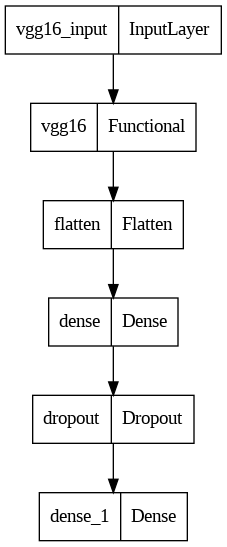

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)

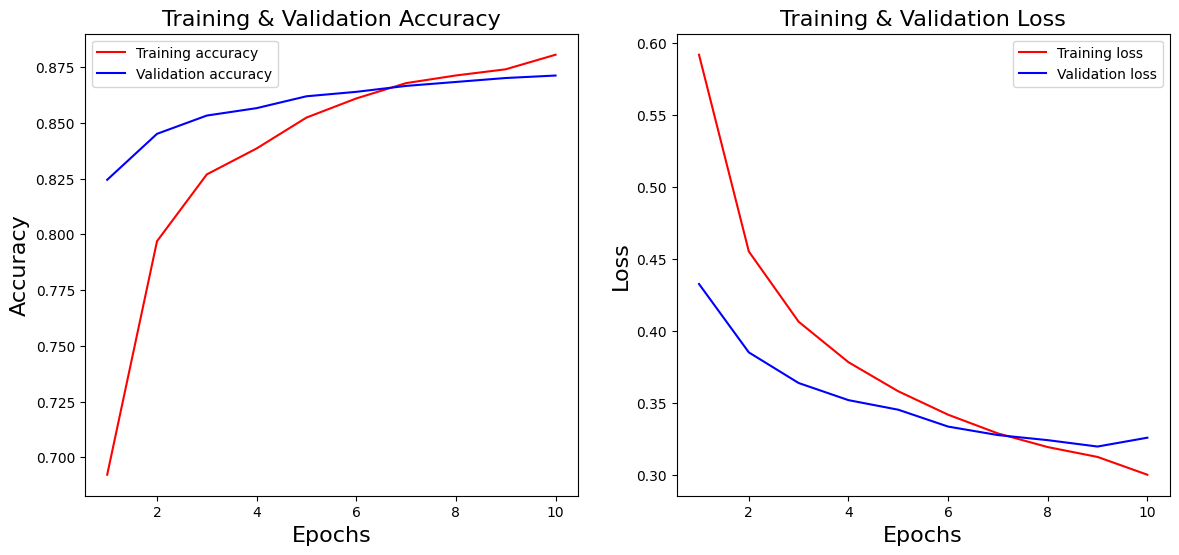

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

### **confusion_matrix**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the class names
class_names = ['Organic', 'Recycle',]

In [ ]:
# Generate predictions using the model on the test data
predictions = model.predict_generator(test_data)

<ipython-input-19-3e06c6607943>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_data)


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
# Retrieve the actual labels from the test dataset
actual_labels = test_data.classes

In [ ]:
# Predicted labels are obtained by finding the index of the maximum predicted value in predictions array
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# Calculate the confusion matrix using actual and predicted labels
cm = confusion_matrix(actual_labels, predicted_labels)

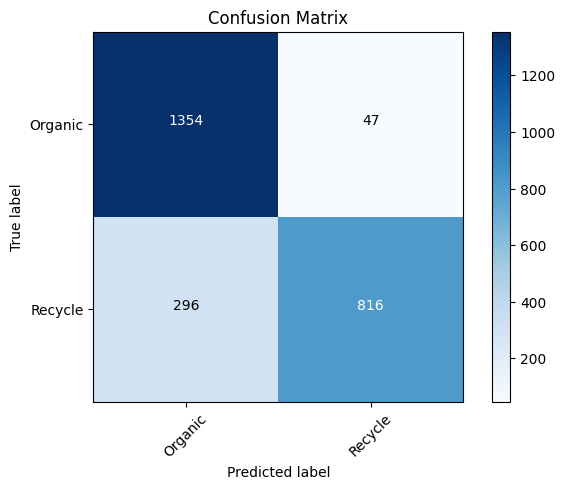

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Confusion matrix


# Plot the confusion matrix as an image
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add the class labels to the plot
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add values to the plot
threshold = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

### ***Evaluation Metrics***

In [ ]:
# Classification Report
from sklearn.metrics import classification_report

# Get classification report
report = classification_report(actual_labels, predicted_labels, target_names=class_names)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     Organic       0.82      0.97      0.89      1401
     Recycle       0.95      0.73      0.83      1112

    accuracy                           0.86      2513
   macro avg       0.88      0.85      0.86      2513
weighted avg       0.88      0.86      0.86      2513



### ***overview of dataset***

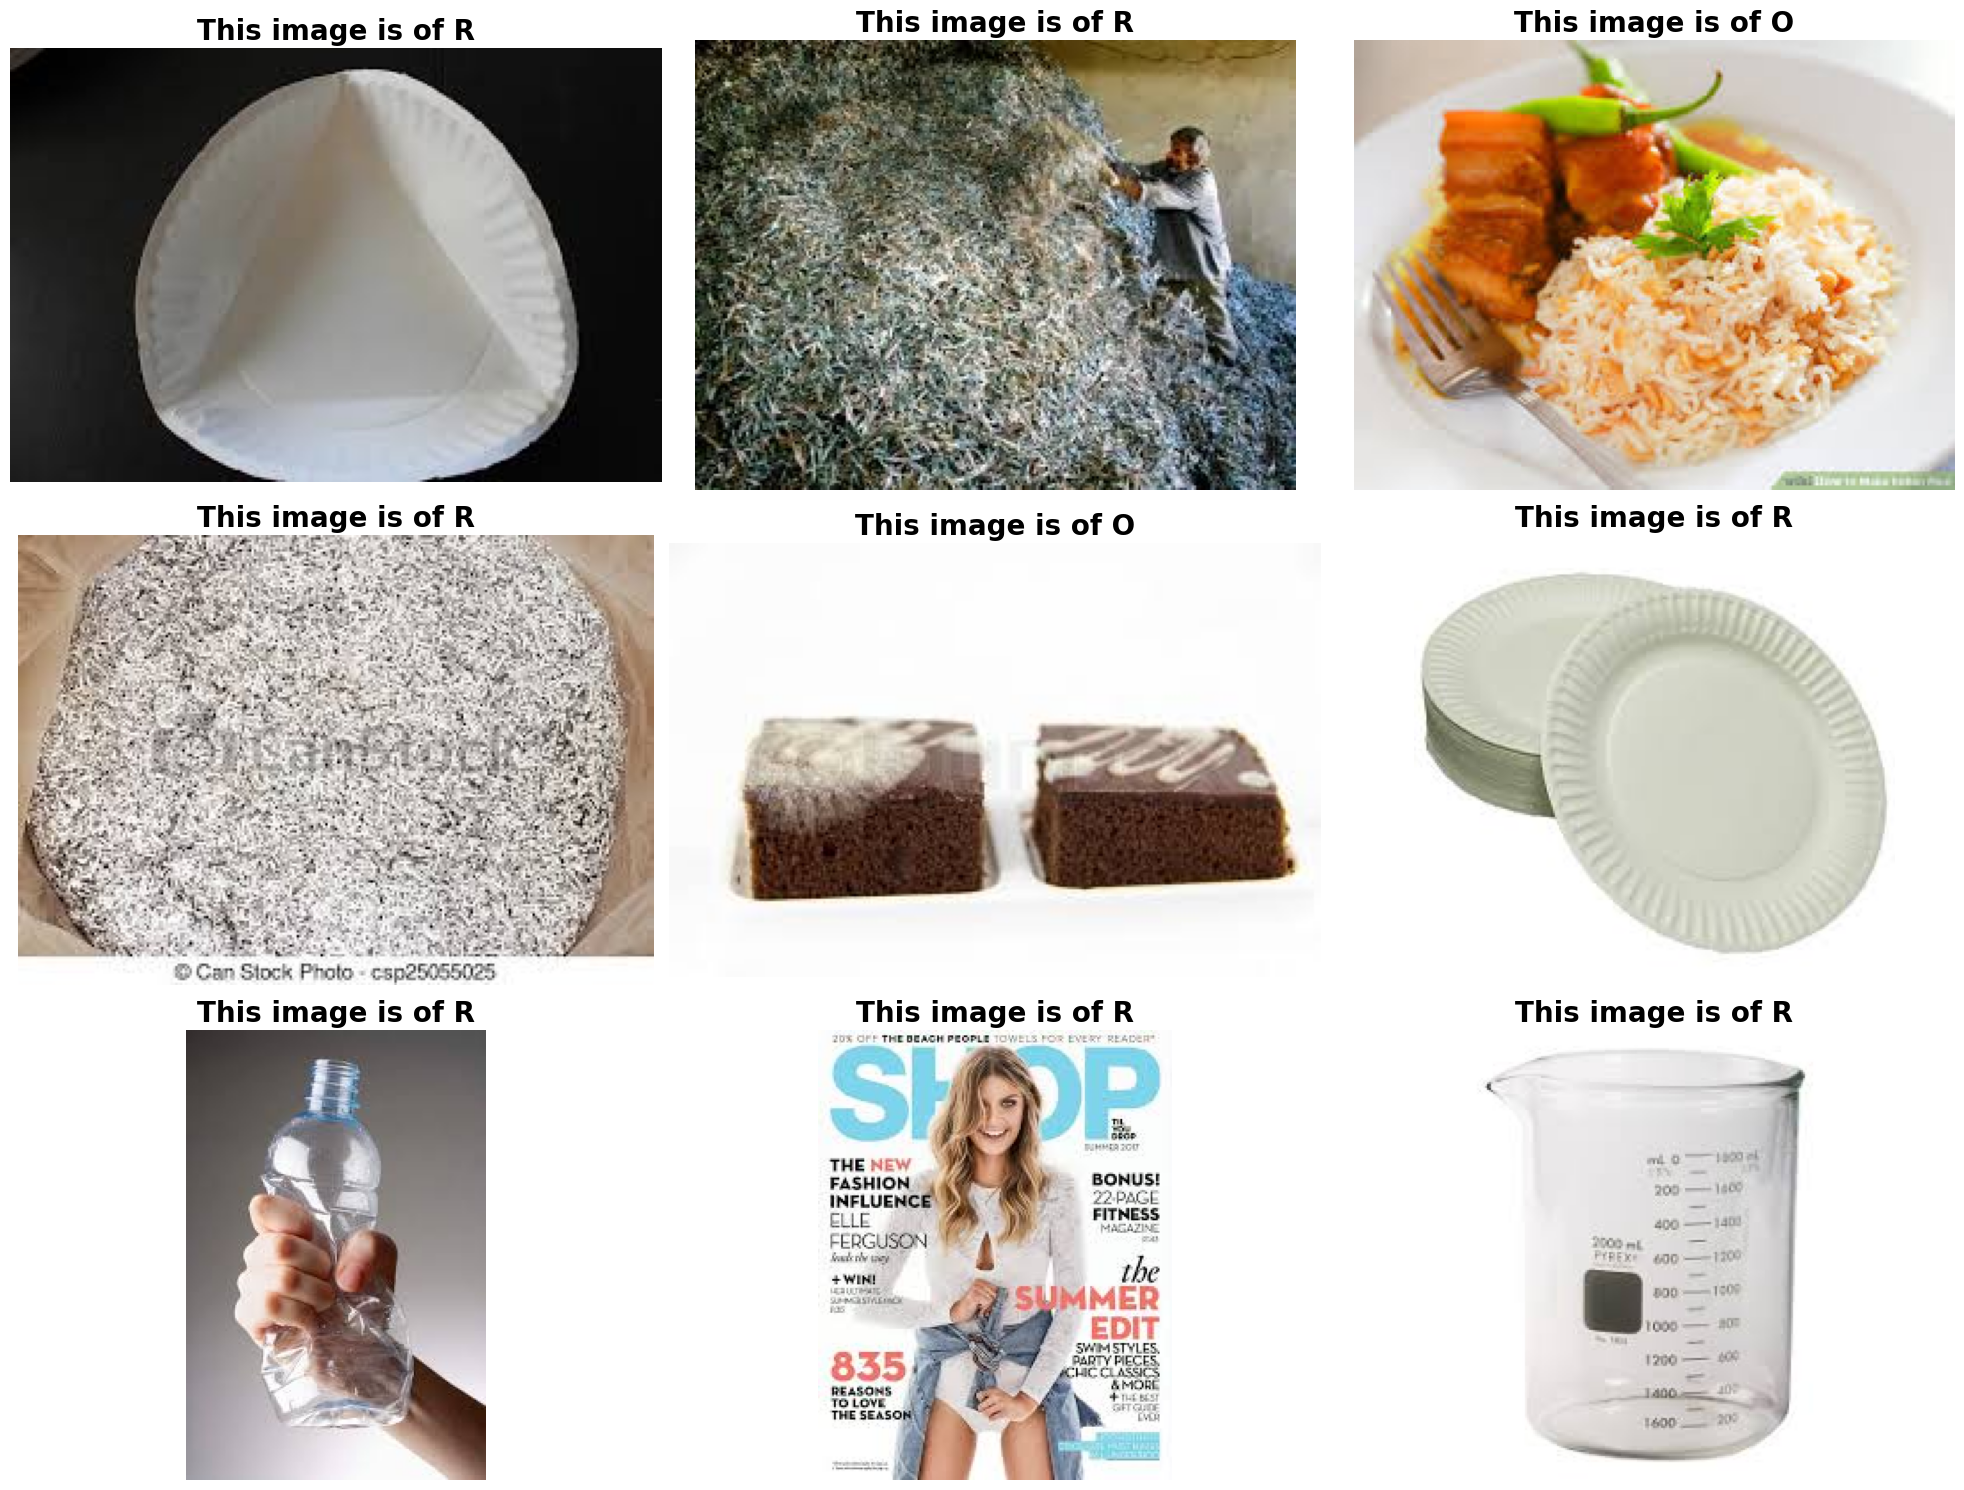

In [ ]:
import pandas as pd
import os
from PIL import Image

# Specify the paths to your training and testing data directories
train_data_dir = "/content/DATASET/TRAIN"
test_data_dir = "/content/DATASET/TEST"

# Define the function to load images and labels into a DataFrame
def load_images_and_labels(data_dir):
    image_data = []
    labels = []
    label_names = os.listdir(data_dir)

    for label_name in label_names:
        label_path = os.path.join(data_dir, label_name)
        if os.path.isdir(label_path):
            label = label_name
            for filename in os.listdir(label_path):
                if filename.endswith(('.png', '.jpg')):
                    image_path = os.path.join(label_path, filename)
                    image = Image.open(image_path)
                    image_data.append(np.array(image))
                    labels.append(label)

    return pd.DataFrame({'image': image_data, 'label': labels})

# Load training and testing data into DataFrames
train_data = load_images_and_labels(train_data_dir)
test_data = load_images_and_labels(test_data_dir)

# Display random images with labels
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    index = np.random.randint(len(train_data))
    plt.title('This image is of {0}'.format(train_data['label'][index]),
              fontdict={'size': 20, 'weight': 'bold'})
    plt.imshow(train_data['image'][index].astype('uint8'))
    plt.axis('off')  # Turn off axis
    plt.tight_layout()

plt.show()

### ***Classes Distrubution***

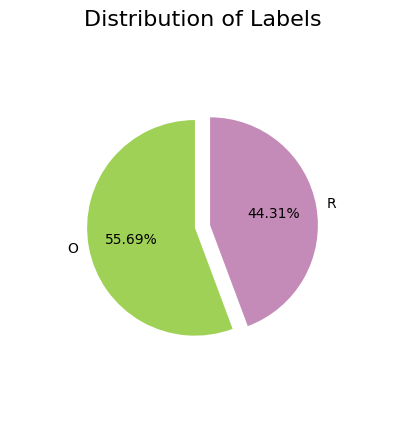

In [ ]:
plt.figure(figsize=(10, 5))  # Set the size of the figure for the pie chart

# Pie chart showing the distribution of labels
colors = ['#a0d157', '#c48bb8']  # Define colors for the different sections of the pie chart

# Create a pie chart using plt.pie() method
# train_data['label'].value_counts() counts the occurrences of each unique label in the dataset
# 'startangle' sets the starting angle for the pie chart (here, it's set to 90 degrees)
# 'explode' separates slices of the pie chart for better visualization (here, both slices are slightly exploded)
# 'autopct' determines the format for displaying the percentages on the chart (here, two decimal places)

plt.pie(train_data['label'].value_counts(), startangle=90, explode=[0.05, 0.05], autopct='%0.2f%%',
        labels=train_data['label'].value_counts().index, colors=colors, radius=0.7)
plt.title('Distribution of Labels', fontsize=16)



# Display the plot
plt.show()

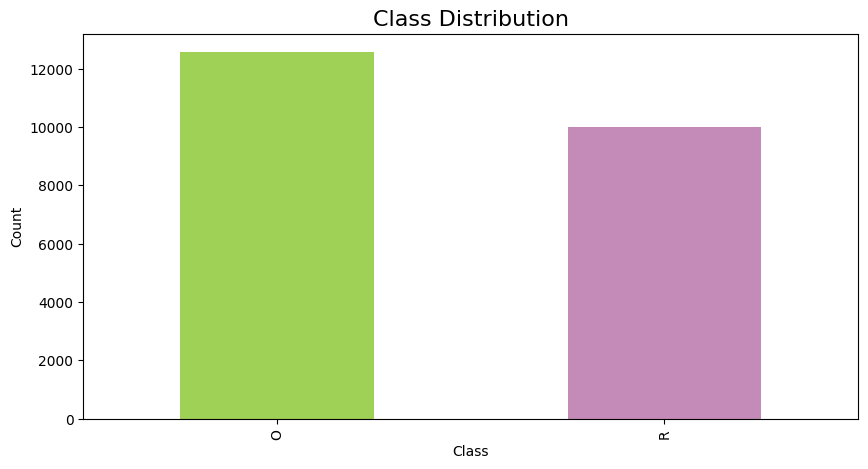

In [ ]:
# Bar chart showing the distribution of labels
plt.figure(figsize=(10, 5))
train_data['label'].value_counts().plot(kind='bar', color=colors)
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()